# Data Exploration

## Preparation
Add the following columns to the data:
- trial_nr
- notification_status
- browser
- frequency
- distribution

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [20]:
folder_path = '../00-data'
file_list = os.listdir(folder_path)
file_list = [file for file in file_list if file.endswith('.csv')]
sorted_files = sorted(file_list, key=lambda x: int(x.split('trial')[1].split('_')[0]))
print(sorted_files)

['trial1_chrome_off_idle.csv', 'trial2_chrome_off_low_even.csv', 'trial3_chrome_of_low_burst.csv', 'trial4_chrome_off_high_even.csv', 'trial5_chrome_off_high_burst.csv', 'trial6_chrome_on_idle.csv', 'trial7_chrome_on_low_even.csv', 'trial8_chrome_on_low_burst.csv', 'trial9_chrome_on_high_even.csv', 'trial10_chrome_on_high_burst.csv']


Combine the 20 files into one data frame.

In [21]:
for file in sorted_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    filename = file.split('.')[0]
    df['trail_nr'] = filename.split('_')[0]
    df['browser'] = filename.split('_')[1]
    df['notification_status'] = filename.split('_')[2]
    df['frequency'] = filename.split('_')[3]
    if len(filename.split('_')) == 5:
        df['distribution'] = filename.split('_')[4]
    else:
        df['distribution'] = ''
    df.to_csv(file_path, index=False)
# show the first 5 rows of the first csv file
df = pd.read_csv('../00-data/trial1_chrome_off_idle.csv')
df.head()# df = ...

,device,subject,run,EXTRA_VOLTAGE,BATTERY_PROPERTY_CURRENT_NOW,Timestamp,Energy trapz (J),Energy simple (J),Avg power (W),trail_nr,browser,notification_status,frequency,distribution
0,pixel5g-wifid,com-android-chrome,0,4320.0,-89602.502339,59.982198,46.088980,46.598190,0.387083,trial1,chrome,off,idle,NaN
1,pixel5g-wifid,com-android-chrome,1,4320.0,-91728.621723,59.996301,47.109575,47.677338,0.396268,trial1,chrome,off,idle,NaN
2,pixel5g-wifid,com-android-chrome,2,4320.0,-91029.313377,59.898820,46.748119,47.331558,0.393247,trial1,chrome,off,idle,NaN
3,pixel5g-wifid,com-android-chrome,3,4320.0,-87688.270093,59.934152,44.908934,45.596624,0.378813,trial1,chrome,off,idle,NaN
4,pixel5g-wifid,com-android-chrome,4,4320.0,-91437.152622,59.991726,47.022149,47.549938,0.395008,trial1,chrome,off,idle,NaN


In [22]:
# this step is to combine all the csv files into one csv file and export it
dfs = []
for file in sorted_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    dfs.append(df)
combined_df = pd.concat(dfs)
combined_df.to_csv('combined.csv', index=False)

## Summary of Data

- summary
- SD, Mean, Median, Min, Max

In [23]:
#summary each file in the file_list
data= []
describe_result = []
for file in sorted_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    data.append(df['Energy trapz (J)'])
    print("\n This is the summary of file: ", file)
    print(df['Energy trapz (J)'].describe())


 This is the summary of file:  trial1_chrome_off_idle.csv
count    30.000000
mean     46.231307
std       2.426237
min      35.072987
25%      45.928497
50%      46.741965
75%      47.259847
max      49.779550
Name: Energy trapz (J), dtype: float64

 This is the summary of file:  trial2_chrome_off_low_even.csv
count    30.000000
mean     48.062190
std       2.258378
min      40.902735
25%      46.846682
50%      47.755688
75%      49.694906
max      52.517839
Name: Energy trapz (J), dtype: float64

 This is the summary of file:  trial3_chrome_of_low_burst.csv
count    30.000000
mean     46.470891
std       3.662616
min      31.836826
25%      46.146616
50%      47.540395
75%      48.074592
max      49.775571
Name: Energy trapz (J), dtype: float64

 This is the summary of file:  trial4_chrome_off_high_even.csv
count    30.000000
mean     57.632000
std       3.423639
min      51.963999
25%      55.341675
50%      57.469885
75%      59.927178
max      66.669379
Name: Energy trapz (J), dt

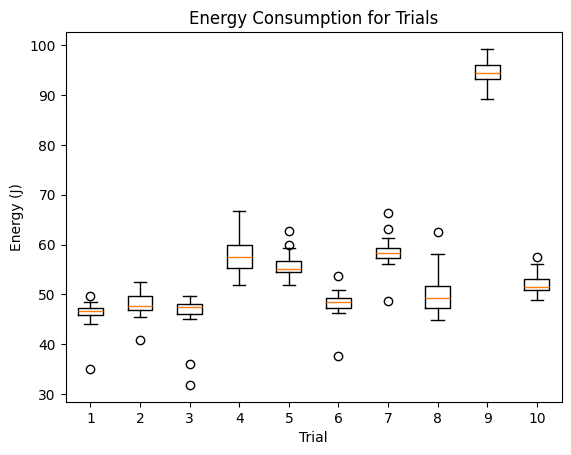

In [24]:
#data = [ df_1['Energy trapz (J)'], df_2['Energy trapz (J)'], df_7['Energy trapz (J)']]
fig, ax = plt.subplots()
ax.boxplot(data)
xticklabels = []
for file in sorted_files:
    xticklabels.append(file.split('_')[0][5:])
ax.set_xticklabels(xticklabels)
ax.set_ylabel('Energy (J)')
ax.set_xlabel('Trial')
ax.set_title('Energy Consumption for Trials')
plt.show()

## Clean Data

Remove outliers? 